# Walkthru of Bikeshare Project Code
## Step 1 - Import dependencies

In [2]:
from calendar import day_name, month_name
from datetime import datetime
from datetime import time as Time
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

(`% matplotlib inline` added for ease of use with jupyter notebooks)

## Step 2 - Obtain User Input

In [3]:
def get_city():
    '''Returns city and filename (out of Chicago, New York and Washington) according to
       user input, while managing incorrect input.

    Args:
        none.
    Returns:
        city: (str) lowercase of input city.
        file: (str) corresponding csv filename.
    '''
    # Ask user for input while managing incorrect input
    while True:
        city = input('\nHello! Let\'s explore some US bikeshare data!\n'
                     'Would you like to see data for Chicago, New York, or Washington?\n').lower()
        # Confirm if input string is one of the listed cities and ask again if not
        if city not in ('chicago', 'new york', 'washington'):
            print('\nYou didn\'t enter an availabe city. Please enter one of the cities listed.\n'
                  'Returning you to the original input request:')
        else:
            break
    # Use the input to select a filename
    if city == 'chicago':
        file = 'chicago.csv'
    elif city == 'new york':
        file = 'new_york_city.csv'
    else:
        file = 'washington.csv'

    return city, file

In [4]:
city, file = get_city()
city, file


Hello! Let's explore some US bikeshare data!
Would you like to see data for Chicago, New York, or Washington?
Chicago


('chicago', 'chicago.csv')

In [5]:
def get_time_period():
    '''Allows the user to select a time filter, while managing incorrect input.

    Args:
        none.
    Returns:
        (str) inputted type of filter.
    '''
    # Ask user for input while incorrect input
    while True:
        time_period = input('\nWould you like to filter the data: by month, day, both or, '
                            'not at all? Type "none" for no time filter.'
                            '(This next step will take some time.)\n').lower()
        # Confirm if input string is one of the listed options and ask again if not
        if time_period not in ('month', 'day', 'both', 'none'):
            print('\nYou didn\'t enter an available filter. Please enter month, day, both or none.'
                  '\nReturning you to the original input request:')
        else:
            break
    # Return user input as (str) lower case
    return time_period

In [7]:
time_period = get_time_period()
time_period


Would you like to filter the data: by month, day, both or, not at all? Type "none" for no time filter.(This next step will take some time.)
both


'both'

The questions asked at this point are dependent upon the filter chosen:
- month: `get_month()`
- day: `get_day()`
- both: `get_month()` and `get_day()`

In [8]:
def get_month():
    '''Returns month between January and June, according to user input, while managing
       incorrect input.

    Args:
        none.
    Returns:
        (int) month as its index of month_name ('January' = 1)
    '''
    # Ask user for input while managing incorrect input
    while True:
        month = input('\nWhich month? January, February, March, April, May, or June?\n').title()
        # Confirm if input string is one of the listed months and ask again if not
        if month not in month_name[:7]:
            print('\nYou didn\'t enter an available month. Please enter one of the months listed.\n'
                  'Returning you to the original input request:')
        else:
            break
    # Return user input as (str) title case
    return list(month_name).index(month)

In [9]:
month = get_month()
month


Which month? January, February, March, April, May, or June?
March


3

In [10]:
def get_day():
    '''Asks the user for a day and returns the corresponding index, while managing
       for incorrect input.

    Args:
        none.
    Returns:
        (int) day of the week as its index of day_name ('Monday' = 0).
    '''
    # Ask user for input while managing incorrect input
    while True:
        day = input('\nWhich day? Please enter a day of the week from Sunday to Saturday.'
                    '\n').title()
        # Confirm if input string is one of the days of the week and ask again if not
        if day not in day_name:
            print('\nYou didn\'t enter an available day. Please enter one of the '
                  'days of the week.\n'
                  'Returning you to the original input request:')
        else:
            break
    # Return (int) of day's index in day_name
    return list(day_name).index(day)

In [11]:
day = get_day()
day


Which day? Please enter a day of the week from Sunday to Saturday.
Tuesday


1

## Step 3 - Create DataFrame

In [79]:
df = pd.read_csv(file)
df.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0


The columns were renamed for consistency in formatting.

In [80]:
df.rename(columns={'Start Time': 'start_time', 'End Time': 'end_time',
                       'Trip Duration': 'trip_duration', 'Start Station': 'start_station',
                       'End Station': 'end_station', 'User Type': 'user_type', 'Gender': 'gender',
                       'Birth Year': 'birth_year'}, inplace=True)

A small amount of data wrangling was completed to ensure columns were in the correct format,

In [81]:
df['start_time'] = pd.to_datetime(df.start_time)

and additional columns added to ease the comparison process.

In [82]:
df['weekday'] = df.start_time.apply(datetime.weekday)

In [83]:
df['trip'] = df.start_station + " to " + df.end_station
df.head()

,start_time,end_time,trip_duration,start_station,end_station,user_type,gender,birth_year,weekday,trip
0,2017-01-01 00:00:36,2017-01-01 00:06:32,356,Canal St & Taylor St,Canal St & Monroe St (*),Customer,NaN,NaN,6,Canal St & Taylor St to Canal St & Monroe St (*)
1,2017-01-01 00:02:54,2017-01-01 00:08:21,327,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,Subscriber,Male,1984.0,6,Larrabee St & Menomonee St to Sheffield Ave & ...
2,2017-01-01 00:06:06,2017-01-01 00:18:31,745,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,Subscriber,Male,1985.0,6,Orleans St & Chestnut St (NEXT Apts) to Ashlan...
3,2017-01-01 00:07:28,2017-01-01 00:12:51,323,Franklin St & Monroe St,Clinton St & Tilden St,Subscriber,Male,1990.0,6,Franklin St & Monroe St to Clinton St & Tilden St
4,2017-01-01 00:07:57,2017-01-01 00:20:53,776,Broadway & Barry Ave,Sedgwick St & North Ave,Subscriber,Male,1990.0,6,Broadway & Barry Ave to Sedgwick St & North Ave


## Step 4 - Filter Dataframe
The dataframe was filtered according to the filters selected by the user. In this case, the first step is the filter related to `month` and the `second` is related to day because the `both` filter was selected.

In [84]:
# Update the dataframe according to the filter
df = df.loc[df.start_time.dt.month == month]

In [85]:
df = df.loc[df.weekday == day]
df.head()

,start_time,end_time,trip_duration,start_station,end_station,user_type,gender,birth_year,weekday,trip
308253,2017-03-07 00:02:27,2017-03-07 00:13:03,636,Michigan Ave & Lake St,Indiana Ave & Roosevelt Rd,Subscriber,Male,1980.0,1,Michigan Ave & Lake St to Indiana Ave & Roosev...
308254,2017-03-07 00:05:01,2017-03-07 00:11:23,382,Ellis Ave & 55th St,Cornell Ave & Hyde Park Blvd,Subscriber,Male,1989.0,1,Ellis Ave & 55th St to Cornell Ave & Hyde Park...
308255,2017-03-07 00:05:16,2017-03-07 00:14:07,531,Adler Planetarium,Wabash Ave & Roosevelt Rd,Subscriber,Female,1981.0,1,Adler Planetarium to Wabash Ave & Roosevelt Rd
308256,2017-03-07 00:05:56,2017-03-07 00:11:52,356,Clark St & Lake St,Canal St & Madison St,Subscriber,Male,1989.0,1,Clark St & Lake St to Canal St & Madison St
308257,2017-03-07 00:06:18,2017-03-07 00:11:37,319,Clinton St & Washington Blvd,Milwaukee Ave & Grand Ave,Subscriber,Male,1977.0,1,Clinton St & Washington Blvd to Milwaukee Ave ...


As a result of the selected filters, only entries during March on Tuesdays remain within the dataframe.

The total `trip_count` is calculated to allow for proportional comparisons.

In [86]:
trip_count = df.shape[0]
trip_count

23129

## Step 5 - Display Statistics
### Start Time Info
Start time info is displayed depending on the `time_period` filters selected:
- none: `popular_month`, `popular_day`, `popular_hour`
- month: `popular_day`, `popular_hour`
- day: `popular_hour`
- both: `popular_hour`

While less necessary in a notebook, the below is included to demonstrate the formatting provided to improve readability within a terminal.

In [87]:
def print_header(city, filter_type, month_filter=None, day_filter=None):
    '''Prints header that indicatses city name and any filters used.

    Args:
        city: (str) city name.
        filter_type: (str) 'none', 'month', 'day', or 'both'.
        month_filter: (int) optional, index of selected month in month_name ('January' = 1).
        day_filter: (int) optional, index of selected day in day_name ('Monday' = 0).
    Returns:
        None.
    '''
    if filter_type == 'none':
        print('\n--- Printing US Bikeshare Statistics for', city.title(), '---'
              '\n    (No filters used)\n')

    if filter_type == 'month':
        print('\n--- Printing US Bikeshare Statistics for', city.title(), '---'
              '\n    (Filter: Month - {})\n'.format(month_name[month_filter]))

    if filter_type == 'day':
        print('\n--- Printing US Bikeshare Statistics for', city.title(), '---'
              '\n    (Filter: Day - {})\n'.format(day_name[day_filter]))

    if filter_type == 'both':
        print('\n--- Printing US Bikeshare Statistics for', city.title(), '---'
              '\n    (Filters: Month - {}, Day - {})\n'.format(
                  month_name[month_filter], day_name[day_filter]))

In [88]:
print_header(city, time_period, month, day)


--- Printing US Bikeshare Statistics for Chicago ---
    (Filters: Month - March, Day - Tuesday)



The most repeated version of the pie chart was included into a function.

In [89]:
def pie_chart(var_count, var_name, total_count, title):
    '''Creates a pie chart from two values.

    Args:
        var_count: (int) count of variable.
        var_name: (str) variable name.
        total_count: (int) total category count from which variable was selected.
        title: (str) title for chart.
    '''
    values = [var_count, total_count - var_count]
    labels = [var_name, 'Remainder']
    plt.subplots(figsize=(5, 5))
    plt.pie(x=values, labels=labels)
    plt.title(title);

In [90]:
def popular_hour(df, city, trip_count, run_time_list):
    '''Prints the most popular start hour, and its count, from df.
       Appends 'run time info' to a list for future printing.

    Args:
        df: Pandas DataFrame.
        run_time_list: (list).
        city: (str) name of city for df.
        trip_count: (int) number of rows in df.
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    # Find modal hour
    df_time = df.dt.hour
    pop_hour = df_time.mode().loc[0]

    # Convert to 12 hr time
    convert_hour = Time(hour=pop_hour)
    convert_hour = Time.strftime(convert_hour, '%#I %p')

    # Find count of modal hour
    pop_hour_count = df_time.value_counts().loc[pop_hour]

    # Save run-time info and print stats
    run_time_list.append(
        "Calculating the most popular start hour took %s seconds."
        % round((time.time() - start_time), 4)
    )
    print(
        "Most popular hour to start a trip:          {}  (Trips: {:,})"
        .format(convert_hour, pop_hour_count)
        )

    pie_chart(pop_hour_count, convert_hour, trip_count,
              "Trips Started in Most Popular Hour for {}".format(city.title()))

    return run_time_list

Most popular hour to start a trip:          5 PM  (Trips: 3,448)


['Calculating the most popular start hour took 0.003 seconds.']

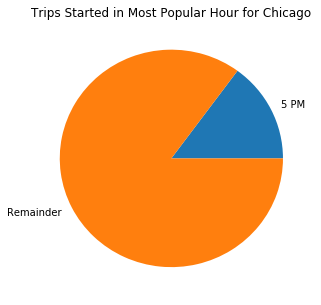

In [93]:
run_time_list = []
popular_hour(df.start_time, city, trip_count, run_time_list)

### Trip Info

In [91]:
def popular_start_station(df, city, trip_count, run_time_list):
    '''Prints the most popular start station, and its count, from df.
       Appends 'run time info' to a list for future printing.

    Args:
        df: Pandas DataFrame.
        run_time_list: (list).
        city: (str) name of city for df.
        trip_count: (int) number of rows in df.
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    # Find modal station
    pop_station = df.mode().loc[0]

    # Find count of modal station
    pop_start_count = df.value_counts().loc[pop_station]

    # Save run-time info and print stats
    run_time_list.append(
        "Calculating the most popular start station took %s seconds."
        % round((time.time() - start_time), 4)
    )
    print(
        "Most popular start station:            {}  (Trips: {:,})"
        .format(pop_station, pop_start_count)
        )

    pie_chart(pop_start_count, pop_station, trip_count,
              "Trips Started from Most Popular Station for {}".format(city.title()))

    return run_time_list

Most popular start station:            Clinton St & Washington Blvd  (Trips: 515)


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.']

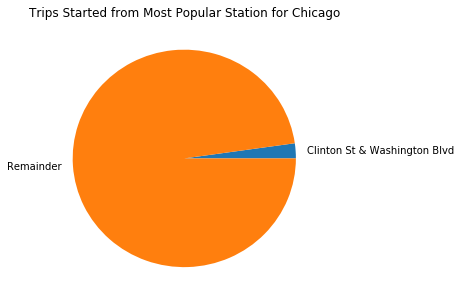

In [94]:
popular_start_station(df.start_station, city, trip_count, run_time_list)

In [95]:
def popular_end_station(df, city, trip_count, run_time_list):
    '''Prints the most popular end station, and its count, from df.
       Appends 'run time info' to a list for future printing.

    Args:
        df: Pandas DataFrame.
        run_time_list: (list).
        city: (str) name of city for df.
        trip_count: (int) number of rows in df.
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    # Find modal station
    pop_station = df.mode().loc[0]

    # Find count of modal station
    pop_start_count = df.value_counts().loc[pop_station]

    # Save run-time info and print stats
    run_time_list.append(
        "Calculating the most popular end station took %s seconds."
        % round((time.time() - start_time), 4)
    )
    print(
        "Most popular end station:              {}  (Trips: {:,})"
        .format(pop_station, pop_start_count)
        )

    pie_chart(pop_start_count, pop_station, trip_count,
              "Trips Ended at Most Popular Station for {}".format(city.title()))

    return run_time_list

Most popular end station:              Clinton St & Washington Blvd  (Trips: 511)


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.',
 'Calculating the most popular end station took 0.007 seconds.']

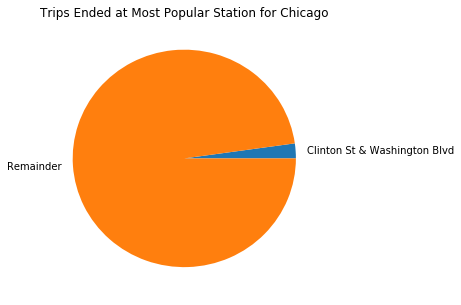

In [96]:
popular_end_station(df.end_station, city, trip_count, run_time_list)

In [97]:
def popular_trip(df, city, trip_count, run_time_list):
    '''Prints the most popular trip, and its count, from df.
       Appends 'run time info' to a list for future printing.

    Args:
        df: Pandas DataFrame.
        run_time_list: (list).
        city: (str) name of city for df.
        trip_count: (int) number of rows in df.
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    # Find modal station
    pop_station = df.mode().loc[0]

    # Find count of modal station
    pop_start_count = df.value_counts().loc[pop_station]

    # Save run-time info and print stats
    run_time_list.append(
        "Calculating the most popular trip took %s seconds."
        % round((time.time() - start_time), 4)
    )
    print(
        "Most popular trip:            {}  (Trips: {:,})"
        .format(pop_station, pop_start_count)
        )

    pie_chart(pop_start_count, pop_station, trip_count,
              "Trips between Most Popular Station Pair for {}".format(city.title()))

    return run_time_list

Most popular trip:            Columbus Dr & Randolph St to Clinton St & Washington Blvd  (Trips: 33)


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.',
 'Calculating the most popular end station took 0.007 seconds.',
 'Calculating the most popular trip took 0.016 seconds.']

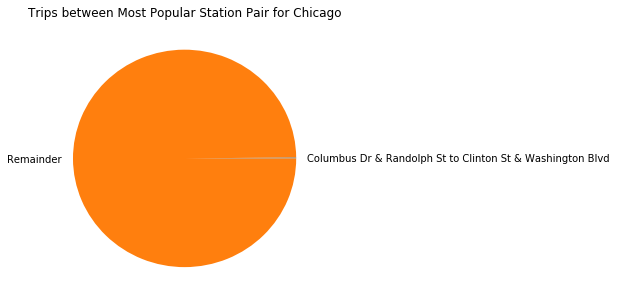

In [98]:
popular_trip(df.trip, city, trip_count, run_time_list)

In [99]:
def trip_duration(df, trip_count, run_time_list):
    '''Prints the overall and average trip duration, from df.
       Appends 'run time info' to a list for future printing.

    Args:
        df: Pandas DataFrame.
        run_time_list: (list).
        city: (str) name of city for df.
        trip_count: (int) number of rows in df.
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    # Find total trip duration
    total_duration = df.sum()
    # Calculate average trip duration
    average_trip = total_duration/trip_count

    # Convert total trip duration to hours
    total_duration = round(total_duration/3600, 4)

    # Convert average_trip to hr, min, sec format
    m, s = divmod(average_trip, 60)
    h, m = divmod(m, 60)
    # Do not report hours if hours is 0
    if h == 0:
        average_trip = "{}min {}sec".format(int(m), round(s, 2))
    else:
        average_trip = "{}hr {}min {}sec".format(int(h), int(m), round(s, 2))

    # Save run-time info and print stats
    run_time_list.append(
        "Calculating the trip duration took %s seconds."
        % round((time.time() - start_time), 4)
    )
    print('Total trip duration:                   {:,} hours'
          .format(total_duration))
    print('Average trip duration:                 {}'.format(average_trip))

    plt.subplots(figsize=(5, 5))
    df.hist(bins=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250])
    plt.title("Trip Durations for {}".format(city.title()))
    plt.xlabel("Trip Duration (in sec)")
        
    return run_time_list

Total trip duration:                   4,370.9922 hours
Average trip duration:                 11min 20.34sec


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.',
 'Calculating the most popular end station took 0.007 seconds.',
 'Calculating the most popular trip took 0.016 seconds.',
 'Calculating the trip duration took 0.001 seconds.']

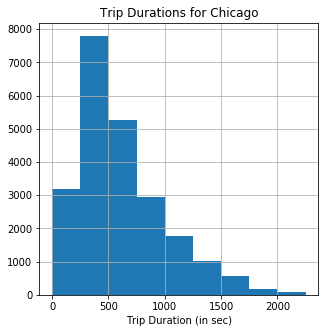

In [100]:
trip_duration(df.trip_duration, trip_count, run_time_list)

### User Info

In [101]:
def user_info(df, city, run_time_list):
    '''Prints the count for two or three user types and total number of users, from df.
       Appends 'run time info' to a list for future printing.

    Args:
        df: Pandas DataFrame.
        column: (str) column name.
        run_time_list: (list).
        city: (str) name of city for df.
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    # Find user types and counts
    user_count = df['user_type'].value_counts()
    user_index = user_count.index

    if user_index.nunique() == 2:
        user_one_type, user_two_type = user_index
        user_one_count = user_count.loc[user_one_type]
        user_two_count = user_count.loc[user_two_type]
        print('Number of "{}" type users:       {:,}\n'
              'Number of "{}" type users:     {:,}'
              .format(
                  user_one_type, user_one_count, user_two_type, user_two_count
                  )
             )

        values = [user_one_count, user_two_count]
        labels = [user_one_type, user_two_type]
        plt.subplots(figsize=(5, 5))
        plt.pie(x=values, labels=labels)
        plt.title("User Types for {}".format(city.title()))

    if user_index.nunique() == 3:
        user_one_type, user_two_type, user_three_type = user_index
        user_one_count = user_count.loc[user_one_type]
        user_two_count = user_count.loc[user_two_type]
        user_three_count = user_count.loc[user_three_type]
        print('Number of trips taken by "{}" type users:            {:,}\n'
              'Number of trips taken by "{}" type users:      {:,}\n'
              'Number of trips taken by "{}" type users:     {:,}'
              .format(
                  user_one_type, user_one_count,
                  user_two_type, user_two_count,
                  user_three_type, user_three_count
                  )
             )

        values = [user_one_count, user_two_count, user_three_count]
        labels = [user_one_type, user_two_type, user_three_type]
        plt.subplots(figsize=(5, 5))
        plt.pie(x=values, labels=labels)
        plt.title("Trips Taken by User Types for {}".format(city.title()))

    # Save run-time info and print stats
    run_time_list.append(
        "Calculating the user counts took %s seconds."
        % round((time.time() - start_time), 4)
    )

    return run_time_list

Number of "Subscriber" type users:       21,883
Number of "Customer" type users:     1,246


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.',
 'Calculating the most popular end station took 0.007 seconds.',
 'Calculating the most popular trip took 0.016 seconds.',
 'Calculating the trip duration took 0.001 seconds.',
 'Calculating the user counts took 0.0301 seconds.']

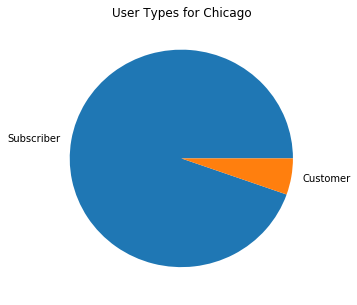

In [102]:
user_info(df, city, run_time_list)

In [103]:
def gender_info(df, column, city, run_time_list):
    '''Checks df for column.
       If column exists, prints the count for three gender types in data.
       If not, prints a statement indicating this.

    Args:
        df: Pandas DataFrame.
        column: (str) column name.
        city: (str) name of city for df.
        run_time_list: (list).
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    if column not in df:
        print('There is no gender information for this set of data.')
    else:
        # Fill missing values
        df[column].fillna('Unknown', inplace=True)
        # Find user types and counts
        gender_count = df[column].value_counts()
        gender_index = gender_count.index

        gender_type_one, gender_type_two, gender_type_three = gender_index
        gender_one_count = gender_count.loc[gender_type_one]
        gender_two_count = gender_count.loc[gender_type_two]
        gender_three_count = gender_count.loc[gender_type_three]

        print('Number of trips taken by users of {} gender:     {:,}\n'
              'Number of trips taken by users of {} gender:      {:,}\n'
              'Nubmer of trips taken by users of {} gender:        {:,}'
              .format(
                  gender_type_one, gender_one_count,
                  gender_type_two, gender_two_count,
                  gender_type_three, gender_three_count
                  )
             )

        values = [gender_one_count, gender_two_count, gender_three_count]
        labels = [gender_type_one, gender_type_two, gender_type_three]
        plt.subplots(figsize=(5, 5))
        plt.pie(x=values, labels=labels)
        plt.title("Trips Taken by Genders for {}".format(city.title()))

    run_time_list.append(
        'Calculating the user gender counts took %s seconds.' % round((time.time() - start_time), 4)
        )

    return run_time_list

Number of trips taken by users of Male gender:     17,448
Number of trips taken by users of Female gender:      4,436
Nubmer of trips taken by users of Unknown gender:        1,245


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.',
 'Calculating the most popular end station took 0.007 seconds.',
 'Calculating the most popular trip took 0.016 seconds.',
 'Calculating the trip duration took 0.001 seconds.',
 'Calculating the user counts took 0.0301 seconds.',
 'Calculating the user gender counts took 0.1334 seconds.']

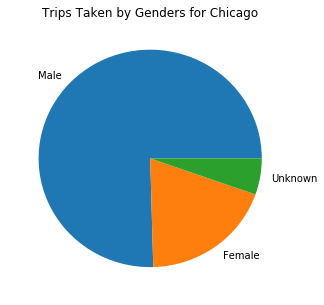

In [104]:
gender_info(df, 'gender', city, run_time_list)

In [105]:
def birth_year_info(df, column, city, run_time_list):
    '''Checks df for column.
       If column exists, prints oldest and youngest user, and most common birth year.
       If not, prints a statement indicating this.

    Args:
        df: Pandas DataFrame.
        column: (str) column name.
        city: (str) name of city for df.
        run_time_list: (list).
    Returns:
        run_time_list: (list) collection of run-time info.
    '''
    start_time = time.time()

    if column not in df:
        print('There is no birth year information for this set of data.')
    else:
        # Drop missing values
        df[column].dropna(inplace=True)

        # Find youngest user with 'reality' check
        young = df[column].max().astype(int)
        if (2016 - young) < 5:
            alt_young = pd.Series(df.birth_year.unique()).nlargest(n=2).iloc[1].astype(int)
            print('Birth year of youngest user:           {} '
                  '\n(Age: {} - This result may be due to user data entry error. '
                  'The next youngest birth year is {})'
                  .format(young, 2016 - young, alt_young))
        else:
            print('Birth year of youngest user:           {} (Age: {})\n'
                  .format(young, 2016 - young))

        # Find youngest user with 'reality' check
        old = df[column].min().astype(int)
        if (2016 - old) > 90:
            alt_old = pd.Series(df.birth_year.unique()).nsmallest(n=2).iloc[1].astype(int)
            print('Birth year of oldest user:           {} '
                  '\n(Age: {} - This result may be due to user data entry error. '
                  'The next oldest birth year is {})'
                  .format(old, 2016 - old, alt_old))
        else:
            print('Birth year of youngest user:           {} (Age: {})\n'
                  .format(old, 2016 - old))

        plt.subplots(figsize=(5, 5))
        df[column].hist()
        plt.title("User Birth Years for {}".format(city.title()))
        plt.xlabel("Year")

        # Find most common birth year
        pop_year = df[column].mode().loc[0].astype(int)

        # Find count of modal birth year
        pop_year_count = df[column].value_counts().loc[pop_year]

        print('Most frequent birth year:              {}  (Users: {:,})'
              .format(pop_year, pop_year_count))

    run_time_list.append(
        'Calculating the user birth year counts took %s seconds.'
        % round((time.time() - start_time), 4)
    )
    return run_time_list

Birth year of youngest user:           2000 (Age: 16)

Birth year of oldest user:           1899 
(Age: 117 - This result may be due to user data entry error. The next oldest birth year is 1900)
Most frequent birth year:              1989  (Users: 1,333)


['Calculating the most popular start hour took 0.003 seconds.',
 'Calculating the most popular start station took 0.01 seconds.',
 'Calculating the most popular end station took 0.007 seconds.',
 'Calculating the most popular trip took 0.016 seconds.',
 'Calculating the trip duration took 0.001 seconds.',
 'Calculating the user counts took 0.0301 seconds.',
 'Calculating the user gender counts took 0.1334 seconds.',
 'Calculating the user birth year counts took 0.0692 seconds.']

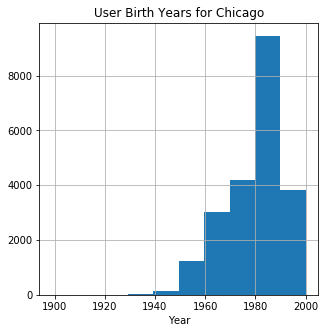

In [106]:
birth_year_info(df, 'birth_year', city, run_time_list)

## Step 6 - Display Raw Data

In [77]:
def display_data(df):
    '''Provides the user the option of viewing five lines of data, repeating this upon request
       until the user responds with 'no'.

    Args:
        Pandas DataFrame.
    Returns:
        none.
    '''
    i = 0
    show_data = input('\nWould you like to see five lines of raw data? Type \'yes\' or \'no\'.\n')
    while show_data.lower() == 'yes':
        print(df.iloc[i:i + 5])
        i += 5
        show_data = input(
            '\nWould you like to see five more lines of raw data? Type \'yes\' or \'no\'.\n'
            )

In [78]:
display_data(df)


Would you like to see five lines of raw data? Type 'yes' or 'no'.
yes
                start_time             end_time  trip_duration  \
308253 2017-03-07 00:02:27  2017-03-07 00:13:03            636   
308254 2017-03-07 00:05:01  2017-03-07 00:11:23            382   
308255 2017-03-07 00:05:16  2017-03-07 00:14:07            531   
308256 2017-03-07 00:05:56  2017-03-07 00:11:52            356   
308257 2017-03-07 00:06:18  2017-03-07 00:11:37            319   

                       start_station                   end_station  \
308253        Michigan Ave & Lake St    Indiana Ave & Roosevelt Rd   
308254           Ellis Ave & 55th St  Cornell Ave & Hyde Park Blvd   
308255             Adler Planetarium     Wabash Ave & Roosevelt Rd   
308256            Clark St & Lake St         Canal St & Madison St   
308257  Clinton St & Washington Blvd     Milwaukee Ave & Grand Ave   

         user_type  gender  birth_year  weekday  \
308253  Subscriber    Male      1980.0        1   
308254  S

As can be seen above, the code will continue to display sequential lines of the dataframe, fives lines at a time, until the user says no. 

The code would then ask the user if they would like to restart the process:

In [ ]:
# Restart?
    restart = input('\nWould you like to restart? Type \'yes\' or \'no\'.\n')
    if restart.lower() == 'yes':
        main()